### День 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Информация об атрибутах: 
> 1. возраст 
> 2. пол 
> 3. тип боли в груди (4 значения) 
> 4. артериальное давление в покое 
> 5. уровень холесторальной сыворотки в мг / дл 
> 6. уровень сахара в крови натощак> 120 мг / дл 
> 7. результаты электрокардиографии в покое (значения 0,1,2) 
> 8. максимальная достигнутая частота сердечных сокращений 
> 9. стенокардия, вызванная физической нагрузкой 
> 10. oldpeak = депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом 
> 11. наклон пика сегмента ST при физической нагрузке 
> 12 число крупных сосудов (0-3), окрашенных при флюороскопии 
> 13. талассемия: 3 = нормальное; 6 = исправленный дефект; 7 = обратимый дефект


In [2]:
data = pd.read_csv('heart_new.csv')
data.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null object
chest_pain_type            303 non-null object
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null object
rest_ecg                   303 non-null object
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null object
st_depression              303 non-null float64
st_slope                   303 non-null object
num_major_vessels          303 non-null int64
thalassemia                303 non-null object
target                     303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 33.2+ KB


In [4]:
print(data.shape)

(303, 14)


In [5]:
print(data.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')


In [6]:
data.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [7]:
data.describe(include='object')

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
count,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,3
top,male,typical angina,lower than 120mg/ml,ST-T wave abnormality,no,downsloping,reversable defect
freq,207,143,258,152,204,142,283


In [8]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

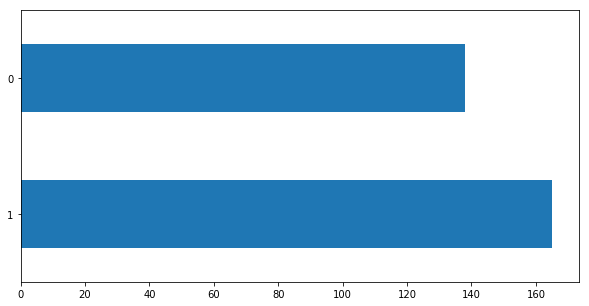

In [27]:
plt.figure(figsize=(10, 5))
data['target'].value_counts().plot(kind='barh')
plt.show()

In [9]:
data.sort_values(by='age', ascending=False).head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
238,77,male,typical angina,125,304,lower than 120mg/ml,normal,162,yes,0.0,downsloping,3,reversable defect,0
144,76,female,non-anginal pain,140,197,lower than 120mg/ml,left ventricular hypertrophy,116,no,1.1,flat,0,reversable defect,1
129,74,female,atypical angina,120,269,lower than 120mg/ml,normal,121,yes,0.2,downsloping,1,reversable defect,1
151,71,female,typical angina,112,149,lower than 120mg/ml,ST-T wave abnormality,125,no,1.6,flat,0,reversable defect,1
60,71,female,non-anginal pain,110,265,greater than 120mg/ml,normal,130,no,0.0,downsloping,1,reversable defect,1


In [10]:
data['target'].mean()

0.5445544554455446

In [11]:
data[data['target'] == 1].mean()

age                         52.496970
resting_blood_pressure     129.303030
cholesterol                242.230303
max_heart_rate_achieved    158.466667
st_depression                0.583030
num_major_vessels            0.363636
target                       1.000000
dtype: float64

In [12]:
data[(data['rest_ecg'] == 'normal') & (data['target'] == 1)].shape[0]

68

In [13]:
data.loc[0:5, 'age': 'rest_ecg']

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality


In [14]:
data.iloc[:5, 0:5]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol
0,63,male,asymptomatic,145,233
1,37,male,non-anginal pain,130,250
2,41,female,atypical angina,130,204
3,56,male,atypical angina,120,236
4,57,female,typical angina,120,354


In [15]:
d = {'male': 1, 'female': 2}
data.replace(d).head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1
2,41,2,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1
3,56,1,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1
4,57,2,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1


In [16]:
data['sex'].map(d).head(5)

0    1
1    1
2    2
3    1
4    2
Name: sex, dtype: int64

In [17]:
colums_to_show = ['resting_blood_pressure','cholesterol', 'max_heart_rate_achieved']
data.groupby('target')[colums_to_show].agg(['mean', 'max', 'min']).reset_index()

target resting_blood_pressure           cholesterol            \
                           mean  max  min        mean  max  min   
0      0             134.398551  200  100  251.086957  409  131   
1      1             129.303030  180   94  242.230303  564  126   

  max_heart_rate_achieved           
                     mean  max min  
0              139.101449  195  71  
1              158.466667  202  96

In [18]:
pd.crosstab(data['target'], data['exercise_induced_angina'], normalize=True)

exercise_induced_angina,no,yes
target,,
0,0.204620,0.250825
1,0.468647,0.075908


In [19]:
data['ch/age'] = data['cholesterol'] / data['age']
data.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,ch/age
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1,3.698413
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1,6.756757
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1,4.975610
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1,4.214286
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1,6.210526


In [20]:
data.drop(columns=['ch/age'], inplace=True)
data.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1


## анализ данных

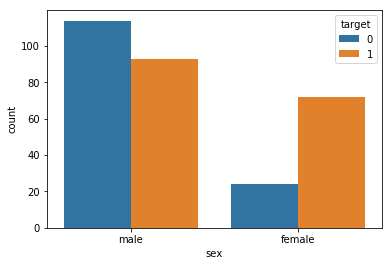

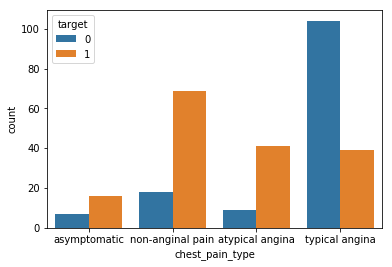

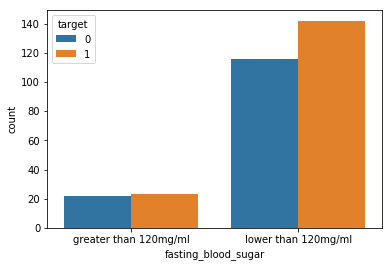

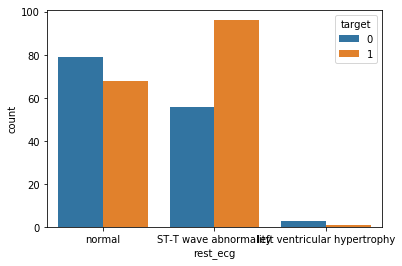

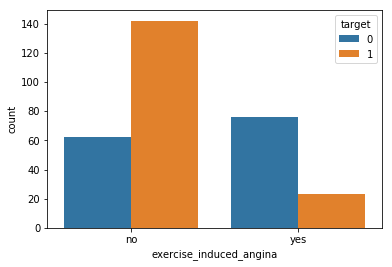

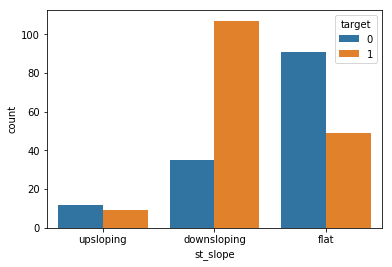

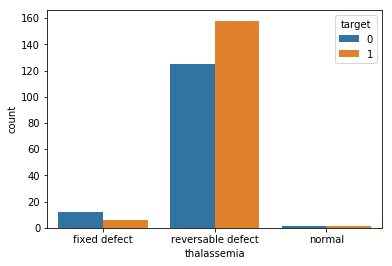

In [21]:
for i in data.select_dtypes(include='object').columns:
    sns.countplot(x=i, data=data, hue=data['target'])
    plt.show()

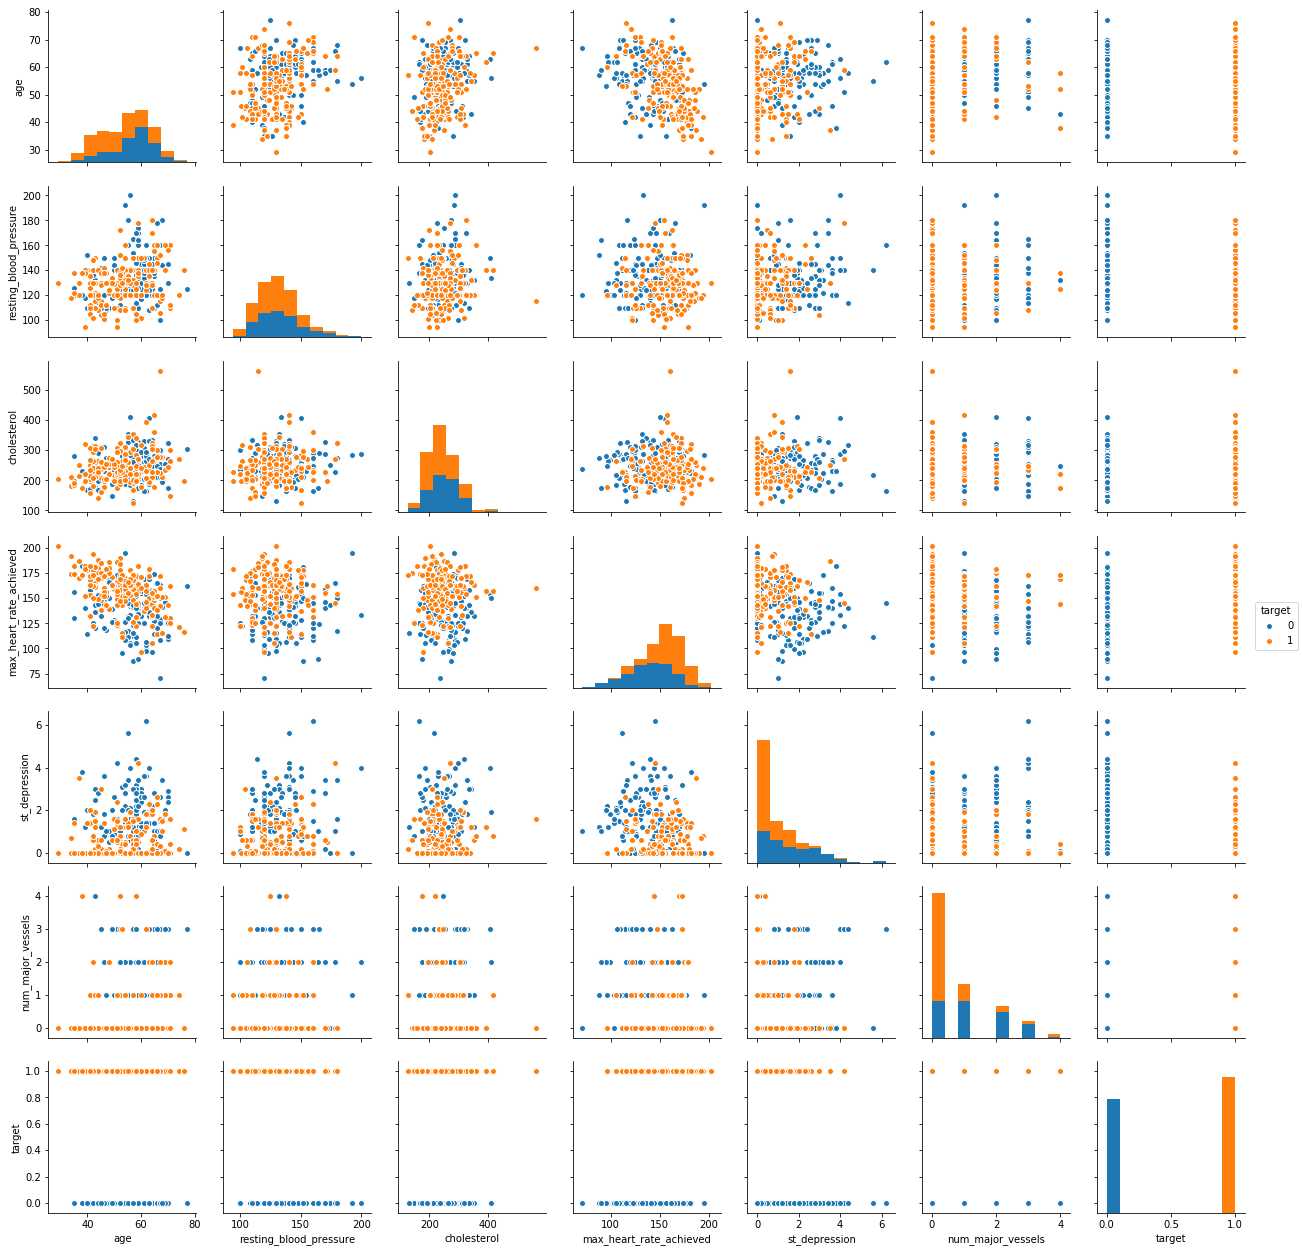

In [31]:
sns.pairplot(data.select_dtypes(include=['int', 'float']), hue='target')
plt.show()

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


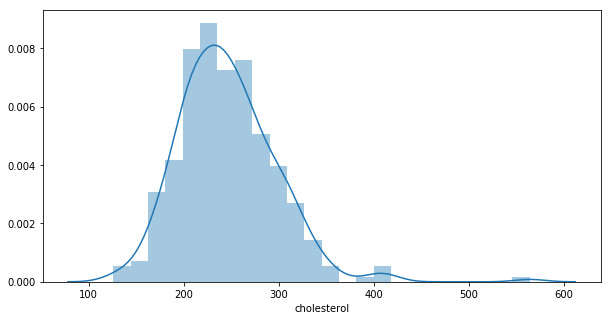

In [32]:
plt.figure(figsize=(10, 5))
sns.distplot(data['cholesterol'])
plt.show()

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


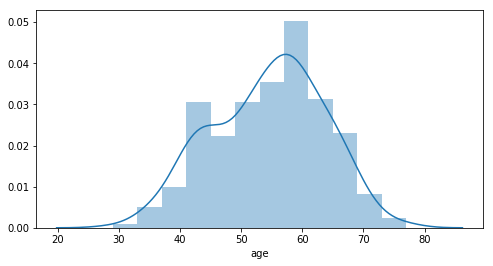

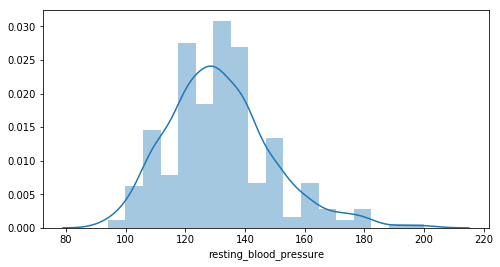

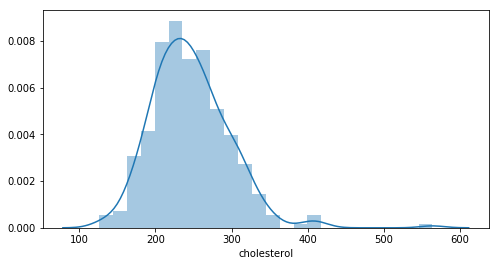

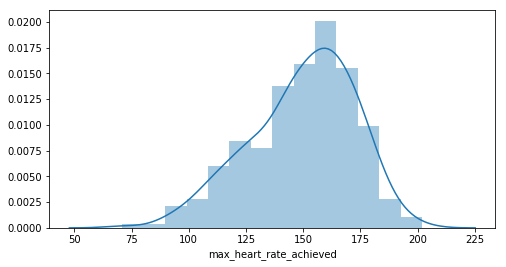

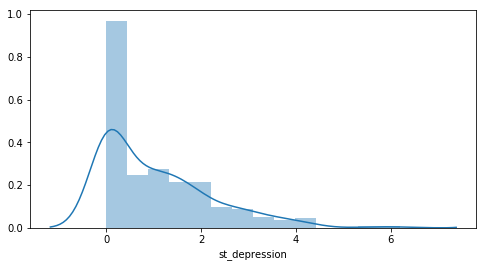

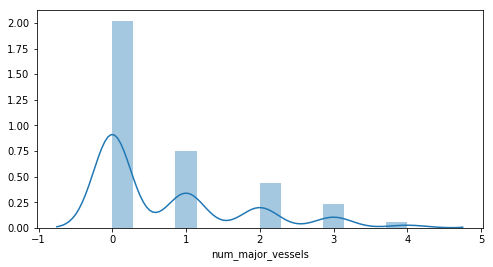

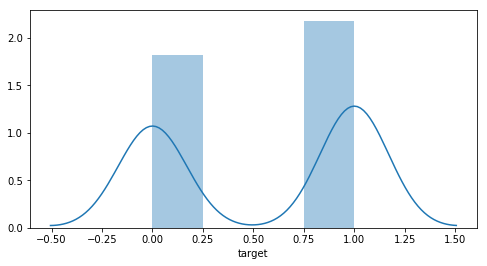

In [47]:
for i in data.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(data[i])
    plt.show()

In [40]:
data.select_dtypes(include=['int', 'float'])

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1
5,57,140,192,148,0.4,0,1
6,56,140,294,153,1.3,0,1
7,44,120,263,173,0.0,0,1
8,52,172,199,162,0.5,0,1
9,57,150,168,174,1.6,0,1


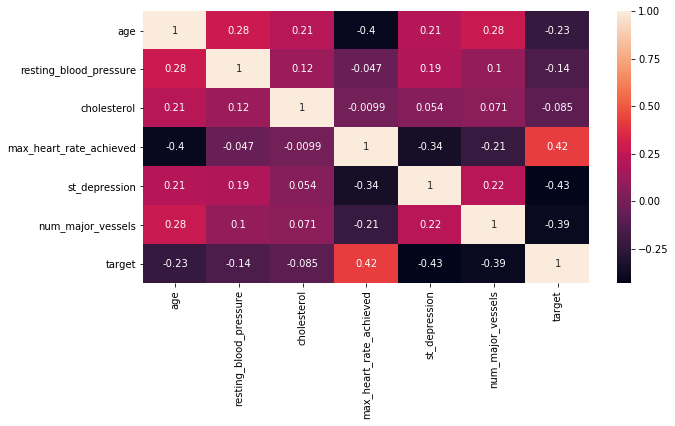

In [46]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(), annot=True)
plt.show()

In [48]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [49]:
X = data.select_dtypes(include=['int', 'float'])
X.drop(columns=['target'], inplace=True)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
%%time
tsne = TSNE()
tsne_rep = tsne.fit_transform(X_scaled)

CPU times: user 5.19 s, sys: 676 ms, total: 5.87 s
Wall time: 5.89 s


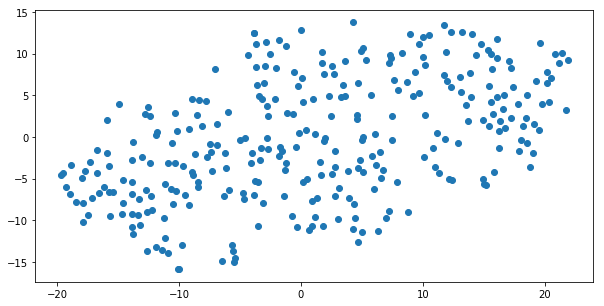

In [53]:
plt.figure(figsize=(10, 5))
plt.scatter(tsne_rep[:,0], tsne_rep[:,1])
plt.show()

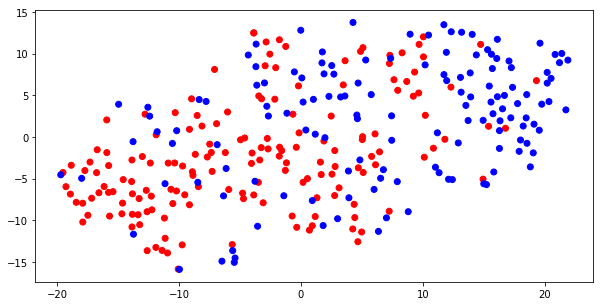

In [54]:
plt.figure(figsize=(10, 5))
plt.scatter(tsne_rep[:,0], tsne_rep[:,1], c=data['target'].map({0:'blue', 1:'red'}))
plt.show()

In [58]:
data_prep = pd.get_dummies(data)
display(data_prep.head(5))
print(data_prep.info())

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,1,...,0,1,1,0,0,0,1,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,1,0,1,0,0,0,0,1
3,56,120,236,178,0.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 26 columns):
age                                          303 non-null int64
resting_blood_pressure                       303 non-null int64
cholesterol                                  303 non-null int64
max_heart_rate_achieved                      303 non-null int64
st_depression                                303 non-null float64
num_major_vessels                            303 non-null int64
target                                       303 non-null int64
sex_female                                   303 non-null uint8
sex_male                                     303 non-null uint8
chest_pain_type_asymptomatic                 303 non-null uint8
chest_pain_type_atypical angina              303 non-null uint8
chest_pain_type_non-anginal pain             303 non-null uint8
chest_pain_type_typical angina               303 non-null uint8
fasting_blood_sugar_greater than 120mg/ml    303 non-null uin

### День 2

In [63]:
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

In [59]:
data_prep.head(5)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,1,...,0,1,1,0,0,0,1,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,1,0,1,0,0,0,0,1
3,56,120,236,178,0.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
